In [60]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('aps_failure_training_set1.csv')

In [3]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
df.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [5]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

<AxesSubplot:xlabel='class', ylabel='count'>

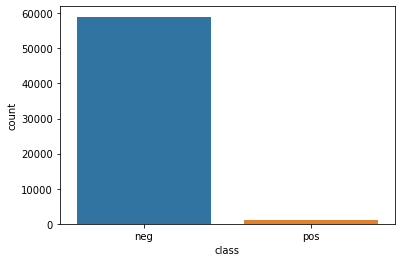

In [6]:
sns.countplot(x='class',data=df)

In [7]:
df['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

### In the given Data set you can find that , Data is highly Imbalance

In [8]:
df['ad_000'].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

# Handling Missing Value

In [9]:
df.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

##### You can see that by using isna() function it is not giving me the count of na or nan value in data set, which mean na and nan are present inside data set but it is in the categorical type.

In [10]:
df.replace(to_replace=['na','nan'],value=np.NaN,inplace=True)

In [11]:
df.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [12]:
df = df.fillna(0)

In [13]:
df.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

# Handling Categorical Feature

In [14]:
df['class'].unique()

array(['neg', 'pos'], dtype=object)

##### Here we find , our dependent or target feature are in categorical feature and we need to handle it because our ML model is not good with categorical features.

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [16]:
# convert pos and neg to 0 and 1 
df['class'] = LE.fit_transform(df['class'])

In [17]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,60000.0,0.016667,0.128020,0.0,0.0,0.0,0.0,1.0
aa_000,60000.0,59336.499567,145430.056532,0.0,834.0,30776.0,48668.0,2746564.0


In [20]:
# here we see only 2 features are describe because rest of the feature's data type is object
df.dtypes

class      int32
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [21]:
df.describe(include=object).T

,count,unique,top,freq
ab_000,60000,30,0,46329
ac_000,60000,2062,0,8752
ad_000,60000,1887,0,14861
ae_000,60000,334,0,55543
af_000,60000,419,0,55476
...,...,...,...,...
ee_007,60000,30470,0,7898
ee_008,60000,24214,0,17280
ee_009,60000,9725,0,31863
ef_000,60000,29,0,57021


# Spliting data into train and test

In [22]:
x = df.drop('class', axis=1)
y = df['class']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=50)

In [24]:
x_train.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
33412,85994,0,2130706432,262,0,0,0,0,0,0,...,801850,381888,727122,671712,548948,341828,387266,17160,0,0
29576,94,0,4,2,0,0,0,0,0,9816,...,1048,480,234,1210,902,100,0,0,0,0
58174,58,0,8,0,0,0,0,0,0,0,...,884,258,430,746,126,12,0,0,0,0
35538,14420,0,164,128,0,0,0,0,0,5546,...,222018,39298,153988,50740,71906,107352,362,0,0,0
12447,40434,0,0,0,0,0,0,0,0,0,...,350940,153302,350674,443816,201952,116782,149996,22236,0,0


In [25]:
x_test.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
6820,41636,0,158,150,0,0,0,0,0,0,...,444486,315284,741330,350646,104838,30512,7688,62,0,0
11854,48,0,22,0,0,0,0,0,0,0,...,1134,120,122,46,132,52,0,0,0,0
9635,1196,0,56,52,0,0,0,0,0,324,...,4980,2882,6926,7176,9170,20044,4,0,0,0
45077,14,0,16,16,0,0,0,0,0,0,...,78,24,52,84,60,6,0,0,0,0
18764,1414,0,38,38,0,0,0,0,0,19020,...,5124,2426,5538,3844,6266,35870,18,0,0,0


# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [27]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

# Model


#### Hence this is Classification problem, so we use all classification algorithm

###### 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression()
logisticModel.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = logisticModel.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, plot_confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
print('ACCURACY of model before Hyperparameter Tuning: ', accuracy*100,'%')

ACCURACY of model before Hyperparameter Tuning:  98.61111111111111 %


#### Hyperparameter tuning

In [31]:
param = [{'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
        {'multi_class':['auto', 'ovr','multinomial']}]

In [32]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=logisticModel,param_grid=param, scoring='accuracy',cv = 3, verbose=0)

In [33]:
grid_search.fit(x_train_sc,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'multi_class': ['auto', 'ovr', 'multinomial']}],
             scoring='accuracy')

In [35]:
print('The best parameter after using GridSearchCV :',grid_search.best_params_)

The best parameter after using GridSearchCV : {'solver': 'newton-cg'}


In [36]:
logisticModel_bestParm = LogisticRegression(solver='newton-cg')
logisticModel_bestParm.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(solver='newton-cg')

In [37]:
y_pred_BP = logisticModel_bestParm.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test,y_pred_BP)
print('ACCURACY of model After Hyperparameter Tuning: ', accuracy*100,'%')

ACCURACY of model After Hyperparameter Tuning:  98.73888888888888 %


In [39]:
y_test_pred = logisticModel_bestParm.predict_proba(x_test)

In [40]:
auc = roc_auc_score(y_test, y_test_pred[:,1])
print('The ROC-AREA UNSER CURVE percetage is :',auc*100,'%')

The ROC-AREA UNSER CURVE percetage is : 95.29407830426506 %


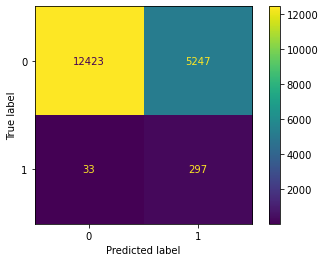

In [41]:
plot_confusion_matrix(logisticModel_bestParm,x_test_sc,y_test)

##### 2. SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc_classifier = SVC(kernel="linear")
svc_classifier.fit(x_train, y_train)

##### 3. Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
y_Pred = decisionTreeModel.predict(x_test)

In [51]:
acc= accuracy_score(y_test, y_Pred)
print('ACCURACY of model Before Hyperparameter Tuning: ', acc*100,'%')

ACCURACY of model Before Hyperparameter Tuning:  98.78888888888889 %


In [53]:
decisionTreeModel_bestParam = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,min_samples_split=3,splitter='random')
decisionTreeModel_bestParam.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=3, splitter='random')

In [54]:
y_Pred_bestParam = decisionTreeModel_bestParam.predict(x_test)

In [56]:
acc= accuracy_score(y_test, y_Pred_bestParam)
print('ACCURACY of model After Hyperparameter Tuning: ', acc*100,'%')

ACCURACY of model After Hyperparameter Tuning:  98.77777777777777 %


In [57]:
y_test_pred = decisionTreeModel_bestParam.predict_proba(x_test)

In [58]:
auc = roc_auc_score(y_test, y_test_pred[:,1])
print('The ROC-AREA UNSER CURVE percetage is :',auc*100,'%')

The ROC-AREA UNSER CURVE percetage is : 96.8361972869613 %


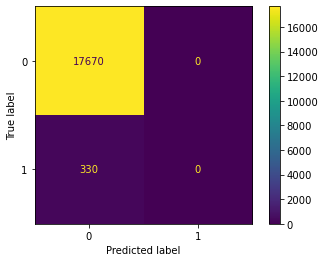

In [59]:
plot_confusion_matrix(decisionTreeModel_bestParam,x_test_sc,y_test)